# EnergyPlus simulation and analysis using Python

## Setup

In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Check the EnergyPlus.exe file can be run

In [2]:
energyplus_install_dir=r'C:\Users\cvskf\EnergyPlusV9-6-0'

In [3]:
cl_st=f'{energyplus_install_dir}\\EnergyPlus'
cl_st

'C:\\Users\\cvskf\\EnergyPlusV9-6-0\\EnergyPlus'

In [4]:
result=subprocess.run(cl_st,
                      capture_output=True
                     )
print('---ARGS---\n',result.args)
print('---RETURNCODE---\n',result.returncode, '(SUCCESS)' if result.returncode==0 else '(FAIL)')
print('---STDOUT---\n',result.stdout.decode())
print('---STDERR---\n',result.stderr.decode())

---ARGS---
 C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus
---RETURNCODE---
 1 (FAIL)
---STDOUT---
 ERROR: Could not find input data file: C:\Users\cvskf\OneDrive - Loughborough University\_Git\stevenkfirth\stevenfirth\energyplus-simulation-and-analysis-using-python\in.idf.
Type 'energyplus --help' for usage.

---STDERR---
 


In [5]:
cl_st=f'{energyplus_install_dir}\\EnergyPlus --help'
cl_st

'C:\\Users\\cvskf\\EnergyPlusV9-6-0\\EnergyPlus --help'

In [6]:
result=subprocess.run(cl_st,
                      capture_output=True
                     )
print('---ARGS---\n',result.args)
print('---RETURNCODE---\n',result.returncode, '(SUCCESS)' if result.returncode==0 else '(FAIL)')
print('---STDOUT---\n',result.stdout.decode())
print('---STDERR---\n',result.stderr.decode())

---ARGS---
 C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus --help
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.03.01 07:04
PythonLinkage: Linked to Python Version: "3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]"
Built on Platform: Windows_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -D, --design-day             Force design-day-only simulation
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
  

## Step 2: Set up directory and files for an EnergyPlus simulation

In [7]:
idf_relative_filepath=r'sim\1ZoneUncontrolled.idf'
epw_relative_filepath=r'sim\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw'#
output_relative_directory='sim'

## Step 3: Run an EnergyPlus simulation

In [8]:
cl_st=(f'"{energyplus_install_dir}\\EnergyPlus" '
       + '--readvars '  # included to create a .csv file of the results
       + f'--output-directory "{output_relative_directory}" '
       + f'--weather "{epw_relative_filepath}" '
       + f'"{idf_relative_filepath}"'
      )
cl_st

'"C:\\Users\\cvskf\\EnergyPlusV9-6-0\\EnergyPlus" --readvars --output-directory "sim" --weather "sim\\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "sim\\1ZoneUncontrolled.idf"'

In [9]:
result=subprocess.run(cl_st,
                      capture_output=True
                     )
print('---ARGS---\n',result.args)
print('---RETURNCODE---\n',result.returncode, '(SUCCESS)' if result.returncode==0 else '(FAIL)')
print('---STDOUT---\n',result.stdout.decode())
print('---STDERR---\n',result.stderr.decode())

---ARGS---
 "C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --readvars --output-directory "sim" --weather "sim\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "sim\1ZoneUncontrolled.idf"
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.03.01 07:04
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Warming up {17}
Warming up {18}
Warming up {19}
Warming up {20}
Warming up {21}
Warming up {22}
Starting Simulation at 12/21 for DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}

## Step 5: Create a parser for the EnergyPlus datetime strings in the results file

In [10]:
def parse_energyplus_datetime_string(st, year=2021):
    st=st.strip()
    month=int(st[0:2])
    day=int(st[3:5])
    hour=int(st[7:9])
    minute=int(st[10:12])
    second=(st[13:15])
    if not hour==24:
        dt=pd.Timestamp(year,month,day,hour,minute)
    else:
        hour=0
        dt=pd.Timestamp(year,month,day,hour,minute)
        dt+=pd.Timedelta('1 day')
    return dt

# test of function - should output `Timestamp('2021-12-21 01:00:00')`
parse_energyplus_datetime_string(' 12/21  01:00:00')

Timestamp('2021-12-21 01:00:00')

## Step 6: Read in the EnergyPlus results file

In [11]:
df=pd.read_csv(r'sim\eplusout.csv', 
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string  # parses the date strings using the function defined above
              )
df

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Total Sky Cover [](Hourly),Environment:Site Opaque Sky Cover [](Hourly),Environment:Site Daylight Saving Time Status [](Daily),Environment:Site Day Type Index [](Daily),ZONE ONE:Zone Total Internal Latent Gain Energy [J](Hourly),TEST 352A:Other Equipment Total Heating Energy [J](Monthly),TEST 352 MINUS:Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Mean Radiant Temperature [C](Hourly),...,ZN001:FLR001:Surface Inside Face Temperature [C](Daily),ZN001:FLR001:Surface Outside Face Temperature [C](Daily),ZN001:FLR001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Inside Face Temperature [C](Daily),ZN001:ROOF001:Surface Outside Face Temperature [C](Daily),ZN001:ROOF001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Outside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZONE ONE:Zone Mean Air Temperature [C](Hourly),ZONE ONE:Zone Air Heat Balance Surface Convection Rate [W](Hourly),ZONE ONE:Zone Air Heat Balance Air Energy Storage Rate [W](Hourly)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2021-12-21 01:00:00,-15.5000,1.250,1.250,NaN,NaN,0.0,NaN,NaN,NaN,-18.208257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.210958,-0.035919,-0.035990
2021-12-21 02:00:00,-15.5000,3.250,3.250,NaN,NaN,0.0,NaN,NaN,NaN,-18.208346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211045,-0.035356,-0.035426
2021-12-21 03:00:00,-15.5000,3.375,3.375,NaN,NaN,0.0,NaN,NaN,NaN,-18.208434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211130,-0.034802,-0.034871
2021-12-21 04:00:00,-15.5000,1.125,1.125,NaN,NaN,0.0,NaN,NaN,NaN,-18.208520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211214,-0.034256,-0.034324
2021-12-21 05:00:00,-15.5000,1.875,1.875,NaN,NaN,0.0,NaN,NaN,NaN,-18.208604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211297,-0.033719,-0.033786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,13.1125,7.750,7.750,NaN,NaN,0.0,NaN,NaN,NaN,12.867497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.881426,-2.833969,-2.655966
2021-12-31 21:00:00,12.6125,5.750,5.750,NaN,NaN,0.0,NaN,NaN,NaN,12.754285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833573,-42.168068,-34.177869
2021-12-31 22:00:00,11.2000,5.000,5.000,NaN,NaN,0.0,NaN,NaN,NaN,12.575910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.676638,-63.531609,-64.006179


## Step 7: Analyse the EnergyPlus results

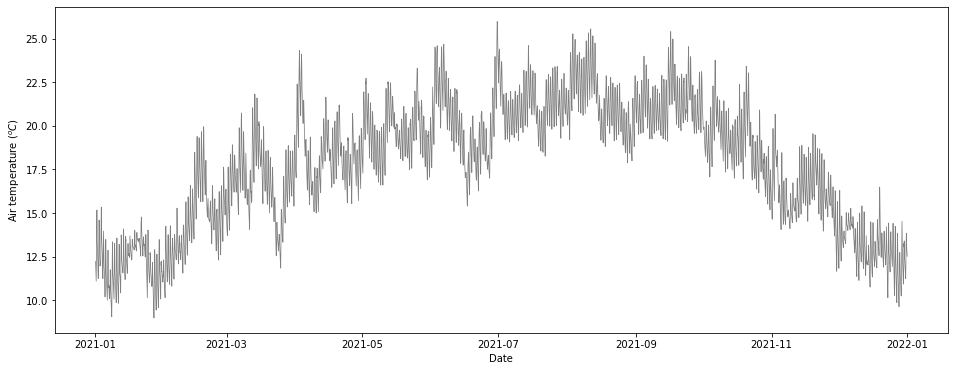

Figure 1: Time series plot of hourly Zone One mean air temperatures.


In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df['ZONE ONE:Zone Mean Air Temperature [C](Hourly)'][48:],  # excludes the first 48 rows which are the winter and summer design day results
        color='grey',
        linewidth=0.75
       )
ax.set_xlabel('Date')
ax.set_ylabel('Air temperature (${^o}C$)')  # using LaTeX to create a degree symbol
plt.show()
print('Figure 1: Time series plot of hourly Zone One mean air temperatures.')